In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from io import StringIO
import datetime
now = datetime.datetime.now().strftime(format="%Y-%m-%d_%H-%M")

# Lecture du fichier CSV
df_train = pd.read_csv('../data/train-sep.csv')

# Séparation des données et prétraitement
X_train = df_train['titre']
y_train = df_train['type']

# Création d'un pipeline et entraînement du modèle
model = make_pipeline(TfidfVectorizer(), LinearSVC())
model.fit(X_train, y_train)

df_test = pd.read_csv('../data/test.csv')  # Replace 'test.csv' with the actual file name
X_test = df_test['titre']

# Prédiction sur l'ensemble de test
predictions = model.predict(X_test)

# Création d'un DataFrame pour comparer les prédictions et les références
resultats = pd.DataFrame({
    'Titre': X_test,
    'Categorie Prédite': predictions
})  

# Réinitialisation de l'index pour une meilleure lisibilité
resultats.reset_index(drop=True, inplace=True)

# Affichage du tableau des résultats
print(resultats)

# Sauvegarder le tableau dans un fichier CSV
resultats.to_csv('../data/resultats_predictions.csv', index=False)

y_true = df_test['type']
precision = accuracy_score(y_true, predictions)
print(f'Précision du modèle : {precision} \n -----------------------------\n')

# Génération d'un rapport de classification
rapport_classification = classification_report(y_true, predictions)
print('Rapport de classification :\n', rapport_classification)

rapport_df = pd.read_fwf(StringIO(rapport_classification), delimiter=';', header=0)
rapport_df.to_csv(f'../data/result/result_tfid_{now}.csv', index=False)

                                                  Titre Categorie Prédite
0                          Roulé à la confiture de lait           Dessert
1                                Croissants aux amandes           Dessert
2     Quinoa Phileas (aux légumes croquants et sauci...    Plat principal
3                   Magret de canard à la crème de mûre    Plat principal
4     St-Jacques a la sauce aux huitres et aux asperges            Entrée
...                                                 ...               ...
1383             Galettes de pommes de terre aux navets    Plat principal
1384  Terrine d'aubergines au thon de Nadine (4ème r...            Entrée
1385              Gateau aux amandes et fleur d'oranger           Dessert
1386                               Cailles au vin rouge    Plat principal
1387  Gratin de pâtes au boeuf, courgettes et mascar...    Plat principal

[1388 rows x 2 columns]
Précision du modèle : 0.8141210374639769 
 -----------------------------

Rapport de cl

[[376  12  19]
 [ 14 213 110]
 [ 16  87 541]]


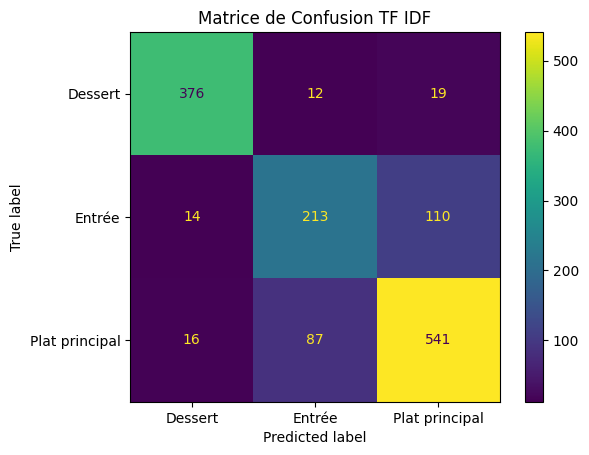

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay

fig = ConfusionMatrixDisplay.from_predictions(y_true, predictions)
fig.ax_.set_title("Matrice de confusion TF IDF")

print(fig.confusion_matrix)